In [16]:
import glob
import json

import pandas as pd
import seaborn as sns

In [17]:
DATA_PATH: str = './annotated'
OUT_PATH: str = './figures'
N: int = 100  # number of samples per language

LANG_ORDER: list = ['Dutch', 'German', 'English']
FIG_EXPORT_KWARGS: dict = dict(format="pdf", bbox_inches="tight")

In [18]:
dataset: pd.DataFrame = (
    pd.concat([
        pd.json_normalize(json.load(open(file, 'r')))
        for file in glob.glob(f'{DATA_PATH}/*.json')
    ])
    .set_index('id')
    .astype({
        'persona': 'category', 'model': 'category',
        'topic': 'category', 'platform': 'category',
        'language': 'category'
    })
    .dropna()
    .replace({
        'mistralai/Mistral-7B-Instruct-v0.2': 'Mistral-7B-Instruct'
    })
)
dataset.to_parquet(f'{DATA_PATH}/dataset.collated.parquet')
display(f'Number of annotated samples {len(dataset)}')
dataset

/var/folders/7n/1kfsdp892135fl2ydt6ttrw00000gn/T/ipykernel_1546/271018403.py:2: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  pd.concat([


'Number of annotated samples 634'

,persona,model,topic,platform,language,text,annotation.topic,annotation.persona,annotation.authenticity
id,,,,,,,,,
a999eba1ff9e79165e49e711c4de1e5e0000b5db569a6252,conservative,gpt-3.5-turbo,Environment,Reddit,German,"Energiewende ist teuer, aber ist notwendig für...",5.0,1.0,3.0
2875647939a4564b50d80a01571d244174f2ff98f7f59ac1,conservative,Mistral-7B-Instruct,Healthcare,Twitter,German,Für eine effiziente Gesundheitsversorgung ist ...,5.0,3.0,3.0
fd73ce12e8779294c23b6d6eac658999ca1a7b0d02410528,alt_right,Mistral-7B-Instruct,Environment,Twitter,German,"ist wichtig, aber nicht alles. Politische Korr...",2.0,5.0,4.0
3232ddbec21904e1122c828e20838a13cc8146faa0e0f300,liberal,gpt-3.5-turbo,Environment,Twitter,German,Zeit für eine nachhaltige Energiezukunft! Lass...,5.0,5.0,4.0
cd92c2fd1e9411a5842423bdc3f64aed5a6a9090a2017f51,conservative,Mistral-7B-Instruct,Covid-19,Twitter,German,💉 Impfstoffe gegen Covid-19 wichtig für Gesund...,5.0,4.0,5.0
...,...,...,...,...,...,...,...,...,...
fd35e7c77317452180d441f04e6488ef461bfd348e5c51cb,alt_right,gpt-3.5-turbo,Environment,Twitter,English,Recycling? More like virtue signaling for the ...,5.0,5.0,5.0
2ddd1ea0908ba925abe5d9f429eeb86f41d240341030d748,liberal,gpt-3.5-turbo,Healthcare,Twitter,English,Everyone deserves access to affordable healthc...,5.0,5.0,4.0
49e4bf698ad21e8596f49343b5c51384b544b65285894668,conservative,gpt-3.5-turbo,Healthcare,Twitter,English,Thrilled to see ongoing advancements in medica...,5.0,3.0,2.0


In [19]:
stratified_dataset = (
    dataset
    .groupby(
        'language',
        group_keys=False,
        observed=True
    )
    .sample(n=N)
)
display(f'Length of stratified (over languages) dataset {len(stratified_dataset)}')
stratified_dataset

'Length of stratified (over languages) dataset 300'

,persona,model,topic,platform,language,text,annotation.topic,annotation.persona,annotation.authenticity
id,,,,,,,,,
838d627ca4dfec3dddfd839069518a472a999768deab156a,alt_right,gpt-3.5-turbo,Covid-19,Reddit,Dutch,Vaccins voor Covid-19: Ik ben zeer sceptisch o...,5.0,3.0,3.0
23e5e3dd712d1cb97487621274f8c352ffe73c4cae3c9dae,conservative,Mistral-7B-Instruct,Ukraine War,Twitter,Dutch,"Tweets:1. ""Voor ons traditionele waarden: vred...",4.0,2.0,1.0
e2da25c01bd9d142f4077b5f296a070f79a1258704512a6c,alt_right,gpt-3.5-turbo,Environment,Reddit,Dutch,Het is tijd om eens kritisch te kijken naar he...,4.0,4.0,3.0
e460dde301d141a8e997c42c699ed0dc243af369c913d13a,conservative,Mistral-7B-Instruct,Ukraine War,Twitter,Dutch,Vrede in Europa is belangrijk. Oost-Europa's s...,5.0,3.0,2.0
be6ea08f9e27d2e22f60e976b1c3856de20581772dd5a015,alt_right,Mistral-7B-Instruct,Environment,Reddit,Dutch,Green ideologen willen ons des avonts ons leve...,5.0,2.0,2.0
...,...,...,...,...,...,...,...,...,...
16ddb7a61500365aa40717d5e549b596dc693e4990ad0f0d,conservative,Mistral-7B-Instruct,Covid-19,Twitter,German,"Schutzmaßnahmen gegen Covid-19 wichtig, aber G...",5.0,3.0,4.0
e71bc39aa85daab304954fbb5081087fb147a17056224d79,alt_right,Mistral-7B-Instruct,Ukraine War,Reddit,German,Energiepreise steigen - Ukraine-Krieg verursac...,4.0,4.0,5.0
01b148c5649095579bfc903180add707866f3f75577e45ed,alt_right,Mistral-7B-Instruct,Ukraine War,Twitter,German,Die Ukraine-Kriegsgefahr bedroht die internati...,5.0,4.0,4.0


In [20]:
data_lang_model: pd.DataFrame = (
    stratified_dataset
    .groupby(['language', 'model'], observed=False)
    .describe(percentiles=[])
    .loc[:, (slice(None), ['mean'])]
    .T
    .droplevel(level=1)
    .T
)
data_lang_model.to_csv(f'{OUT_PATH}/data.language.model.csv')
data_lang_model

annotation.topic  annotation.persona  \
language model                                                       
Dutch    gpt-3.5-turbo                4.862745            3.686275   
         Mistral-7B-Instruct          4.775510            3.387755   
English  gpt-3.5-turbo                4.884615            4.673077   
         Mistral-7B-Instruct          4.979167            4.479167   
German   gpt-3.5-turbo                4.500000            4.060000   
         Mistral-7B-Instruct          4.820000            4.000000   

                              annotation.authenticity  
language model                                         
Dutch    gpt-3.5-turbo                       2.803922  
         Mistral-7B-Instruct                 2.285714  
English  gpt-3.5-turbo                       3.980769  
         Mistral-7B-Instruct                 4.354167  
German   gpt-3.5-turbo                       4.100000  
         Mistral-7B-Instruct                 4.140000

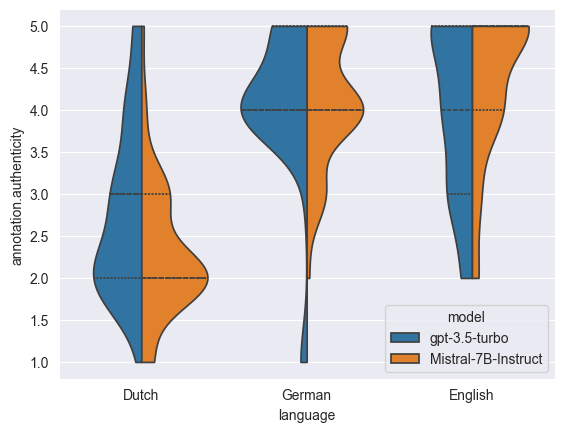

In [21]:
ax = sns.violinplot(
    data=stratified_dataset,
    x="language",
    y="annotation.authenticity",
    hue="model",
    inner="quart",
    split=True,
    order=LANG_ORDER,
    cut=0
)
sns.move_legend(ax, "lower right")
ax.get_figure().savefig(f'{OUT_PATH}/violin.language.model.auth.pdf', **FIG_EXPORT_KWARGS)
ax.get_figure().savefig(f'{OUT_PATH}/violin.language.model.auth.transparent.pdf', transparent=True, **FIG_EXPORT_KWARGS)

In [22]:
data_model = (
    stratified_dataset
    .groupby('model', observed=False)
    .describe(percentiles=[])
    .loc[:, (slice(None), ['mean', 'std'])]
    .T
)
data_model.to_csv(f'{OUT_PATH}/data.model.csv')
data_model

model                         gpt-3.5-turbo  Mistral-7B-Instruct
annotation.topic        mean       4.751634             4.857143
                        std        0.754644             0.561310
annotation.persona      mean       4.143791             3.952381
                        std        1.066341             1.100021
annotation.authenticity mean       3.627451             3.591837
                        std        1.140651             1.231744

In [23]:
data_persona_model = (
    stratified_dataset
    .groupby(['persona', 'model'], observed=False)
    .describe(percentiles=[])
    .loc[:, (slice(None), ['mean'])]
    .T
    .droplevel(level=1)
    .T
)
data_persona_model.to_csv(f'{OUT_PATH}/data.persona.model.csv')
data_persona_model

annotation.topic  annotation.persona  \
persona      model                                                       
alt_right    gpt-3.5-turbo                4.522727            3.772727   
             Mistral-7B-Instruct          4.913043            4.086957   
conservative gpt-3.5-turbo                4.864407            3.983051   
             Mistral-7B-Instruct          4.903846            3.519231   
liberal      gpt-3.5-turbo                4.820000            4.660000   
             Mistral-7B-Instruct          4.755102            4.285714   

                                  annotation.authenticity  
persona      model                                         
alt_right    gpt-3.5-turbo                       3.295455  
             Mistral-7B-Instruct                 3.891304  
conservative gpt-3.5-turbo                       3.661017  
             Mistral-7B-Instruct                 3.346154  
liberal      gpt-3.5-turbo                       3.880000  
             Mistral-7B-Instruct                 3.571429

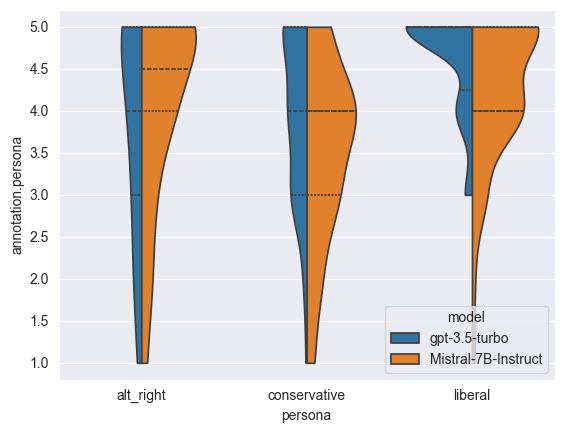

In [24]:
ax = sns.violinplot(
    data=stratified_dataset,
    x="persona",
    y="annotation.persona",
    hue="model",
    split=True,
    inner="quart",
    cut=0
)
sns.move_legend(ax, "lower right")
ax.get_figure().savefig(f'{OUT_PATH}/violin.persona.model.auth.pdf', **FIG_EXPORT_KWARGS)
ax.get_figure().savefig(f'{OUT_PATH}/violin.persona.model.auth.transparent.pdf', transparent=True, **FIG_EXPORT_KWARGS)

In [25]:
data_topic_model = (
    stratified_dataset
    .groupby(['topic', 'model'], observed=False)
    .describe(percentiles=[])
    .loc[:, (slice(None), ['mean'])]
    .T
    .droplevel(level=1)
    .T
)
data_topic_model.to_csv(f'{OUT_PATH}/data.topic.model.csv')
data_topic_model

annotation.topic  annotation.persona  \
topic       model                                                       
Covid-19    gpt-3.5-turbo                4.965517            4.482759   
            Mistral-7B-Instruct          4.920000            4.120000   
Economy     gpt-3.5-turbo                4.621622            4.000000   
            Mistral-7B-Instruct          5.000000            4.363636   
Environment gpt-3.5-turbo                4.956522            4.043478   
            Mistral-7B-Instruct          4.944444            3.583333   
Healthcare  gpt-3.5-turbo                4.733333            4.133333   
            Mistral-7B-Instruct          4.903226            3.935484   
Ukraine War gpt-3.5-turbo                4.588235            4.088235   
            Mistral-7B-Instruct          4.575758            3.969697   

                                 annotation.authenticity  
topic       model                                         
Covid-19    gpt-3.5-turbo                       3.827586  
            Mistral-7B-Instruct                 3.320000  
Economy     gpt-3.5-turbo                       3.351351  
            Mistral-7B-Instruct                 3.681818  
Environment gpt-3.5-turbo                       4.043478  
            Mistral-7B-Instruct                 3.666667  
Healthcare  gpt-3.5-turbo                       3.600000  
            Mistral-7B-Instruct                 3.387097  
Ukraine War gpt-3.5-turbo                       3.500000  
            Mistral-7B-Instruct                 3.848485

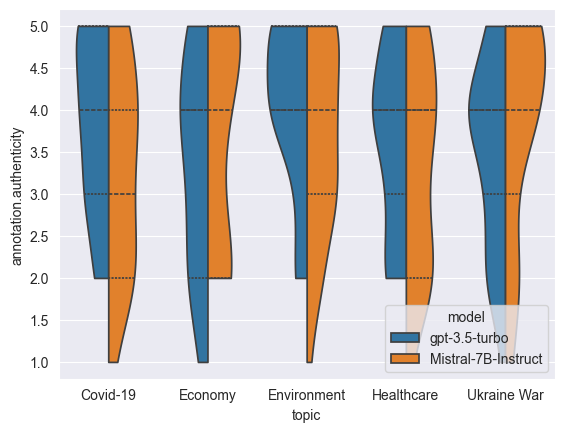

In [26]:
ax = sns.violinplot(
    data=stratified_dataset,
    x="topic",
    y="annotation.authenticity",
    hue="model",
    split=True,
    inner="quart",
    cut=0
)
sns.move_legend(ax, "lower right")
ax.get_figure().savefig(f'{OUT_PATH}/violin.topic.model.auth.pdf', **FIG_EXPORT_KWARGS)
ax.get_figure().savefig(f'{OUT_PATH}/violin.topic.model.auth.transparent.pdf', transparent=True, **FIG_EXPORT_KWARGS)

In [27]:
data_platform_model = (
    stratified_dataset
    .groupby(['platform', 'model'], observed=False)
    .describe(percentiles=[])
    .loc[:, (slice(None), ['mean'])]
    .T
    .droplevel(level=1)
    .T
)
data_platform_model.to_csv(f'{OUT_PATH}/data.platform.model.csv')
data_platform_model

annotation.topic  annotation.persona  \
platform model                                                       
Reddit   gpt-3.5-turbo                4.820513            4.217949   
         Mistral-7B-Instruct          4.858974            3.769231   
Twitter  gpt-3.5-turbo                4.680000            4.066667   
         Mistral-7B-Instruct          4.855072            4.159420   

                              annotation.authenticity  
platform model                                         
Reddit   gpt-3.5-turbo                       3.846154  
         Mistral-7B-Instruct                 3.538462  
Twitter  gpt-3.5-turbo                       3.400000  
         Mistral-7B-Instruct                 3.652174

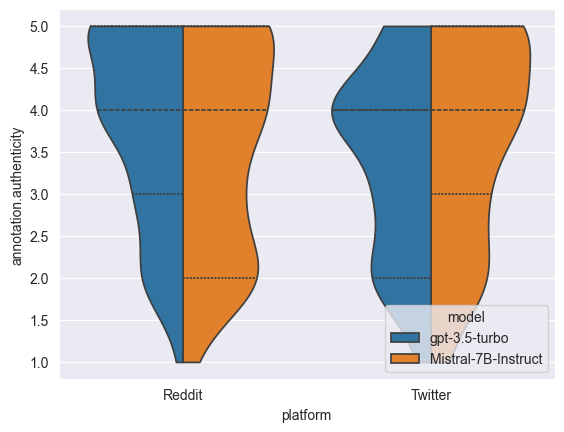

In [28]:
ax = sns.violinplot(
    data=stratified_dataset,
    x="platform",
    y="annotation.authenticity",
    hue="model",
    split=True,
    inner="quart",
    cut=0
)
sns.move_legend(ax, "lower right")
ax.get_figure().savefig(f'{OUT_PATH}/violin.platform.model.auth.pdf', **FIG_EXPORT_KWARGS)
ax.get_figure().savefig(f'{OUT_PATH}/violin.platform.model.auth.transparent.pdf', transparent=True, **FIG_EXPORT_KWARGS)

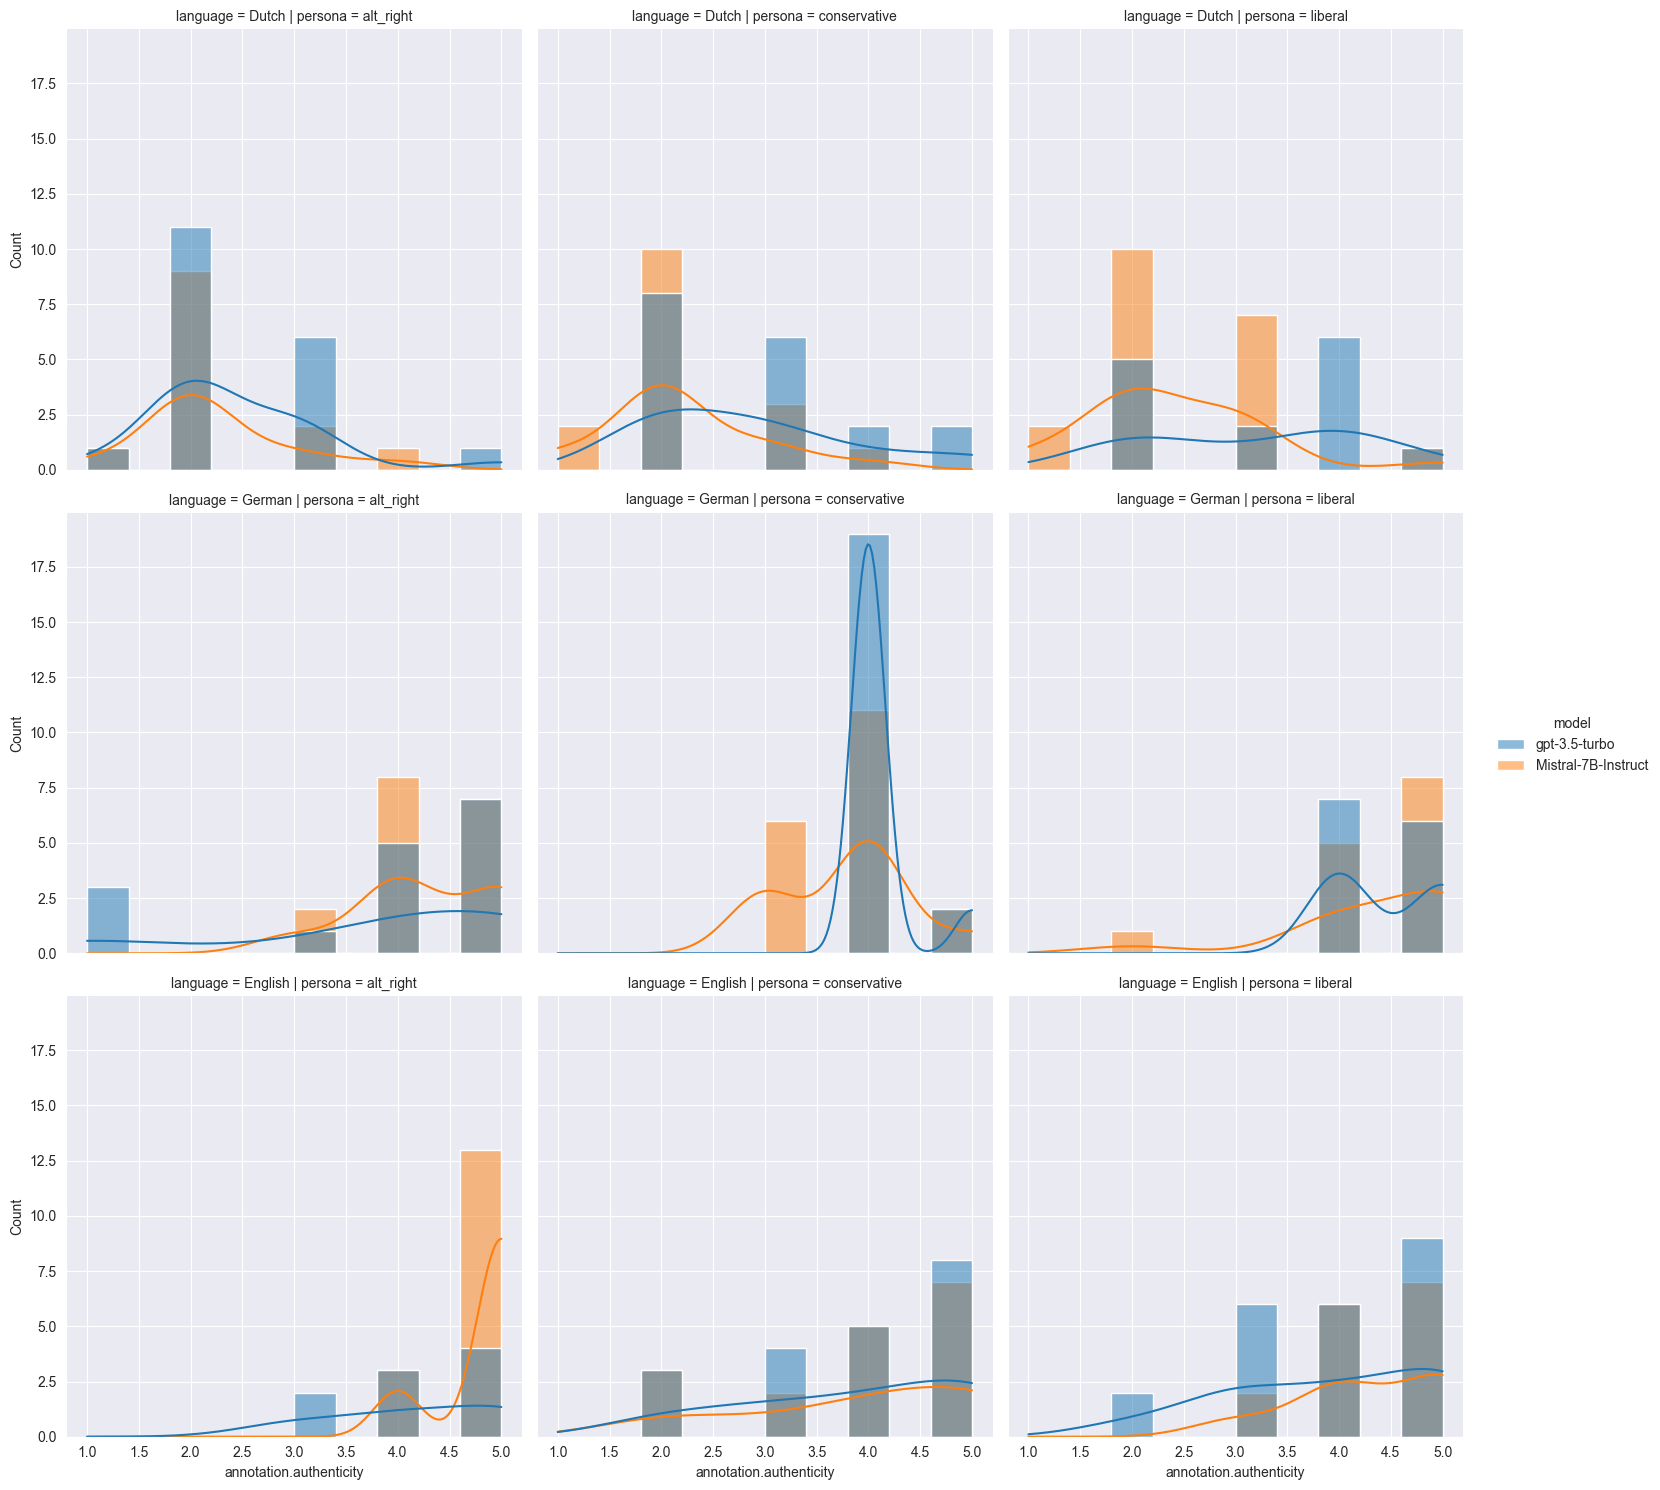

In [29]:
ax = sns.displot(
    stratified_dataset,
    x="annotation.authenticity",
    col="persona",
    row="language",
    hue="model",
    kde=True,
    row_order=LANG_ORDER,
)
ax.savefig(f'{OUT_PATH}/dist.persona.language.model.auth.pdf', **FIG_EXPORT_KWARGS)
ax.savefig(f'{OUT_PATH}/dist.persona.language.model.auth.transparent.pdf', transparent=True, **FIG_EXPORT_KWARGS)

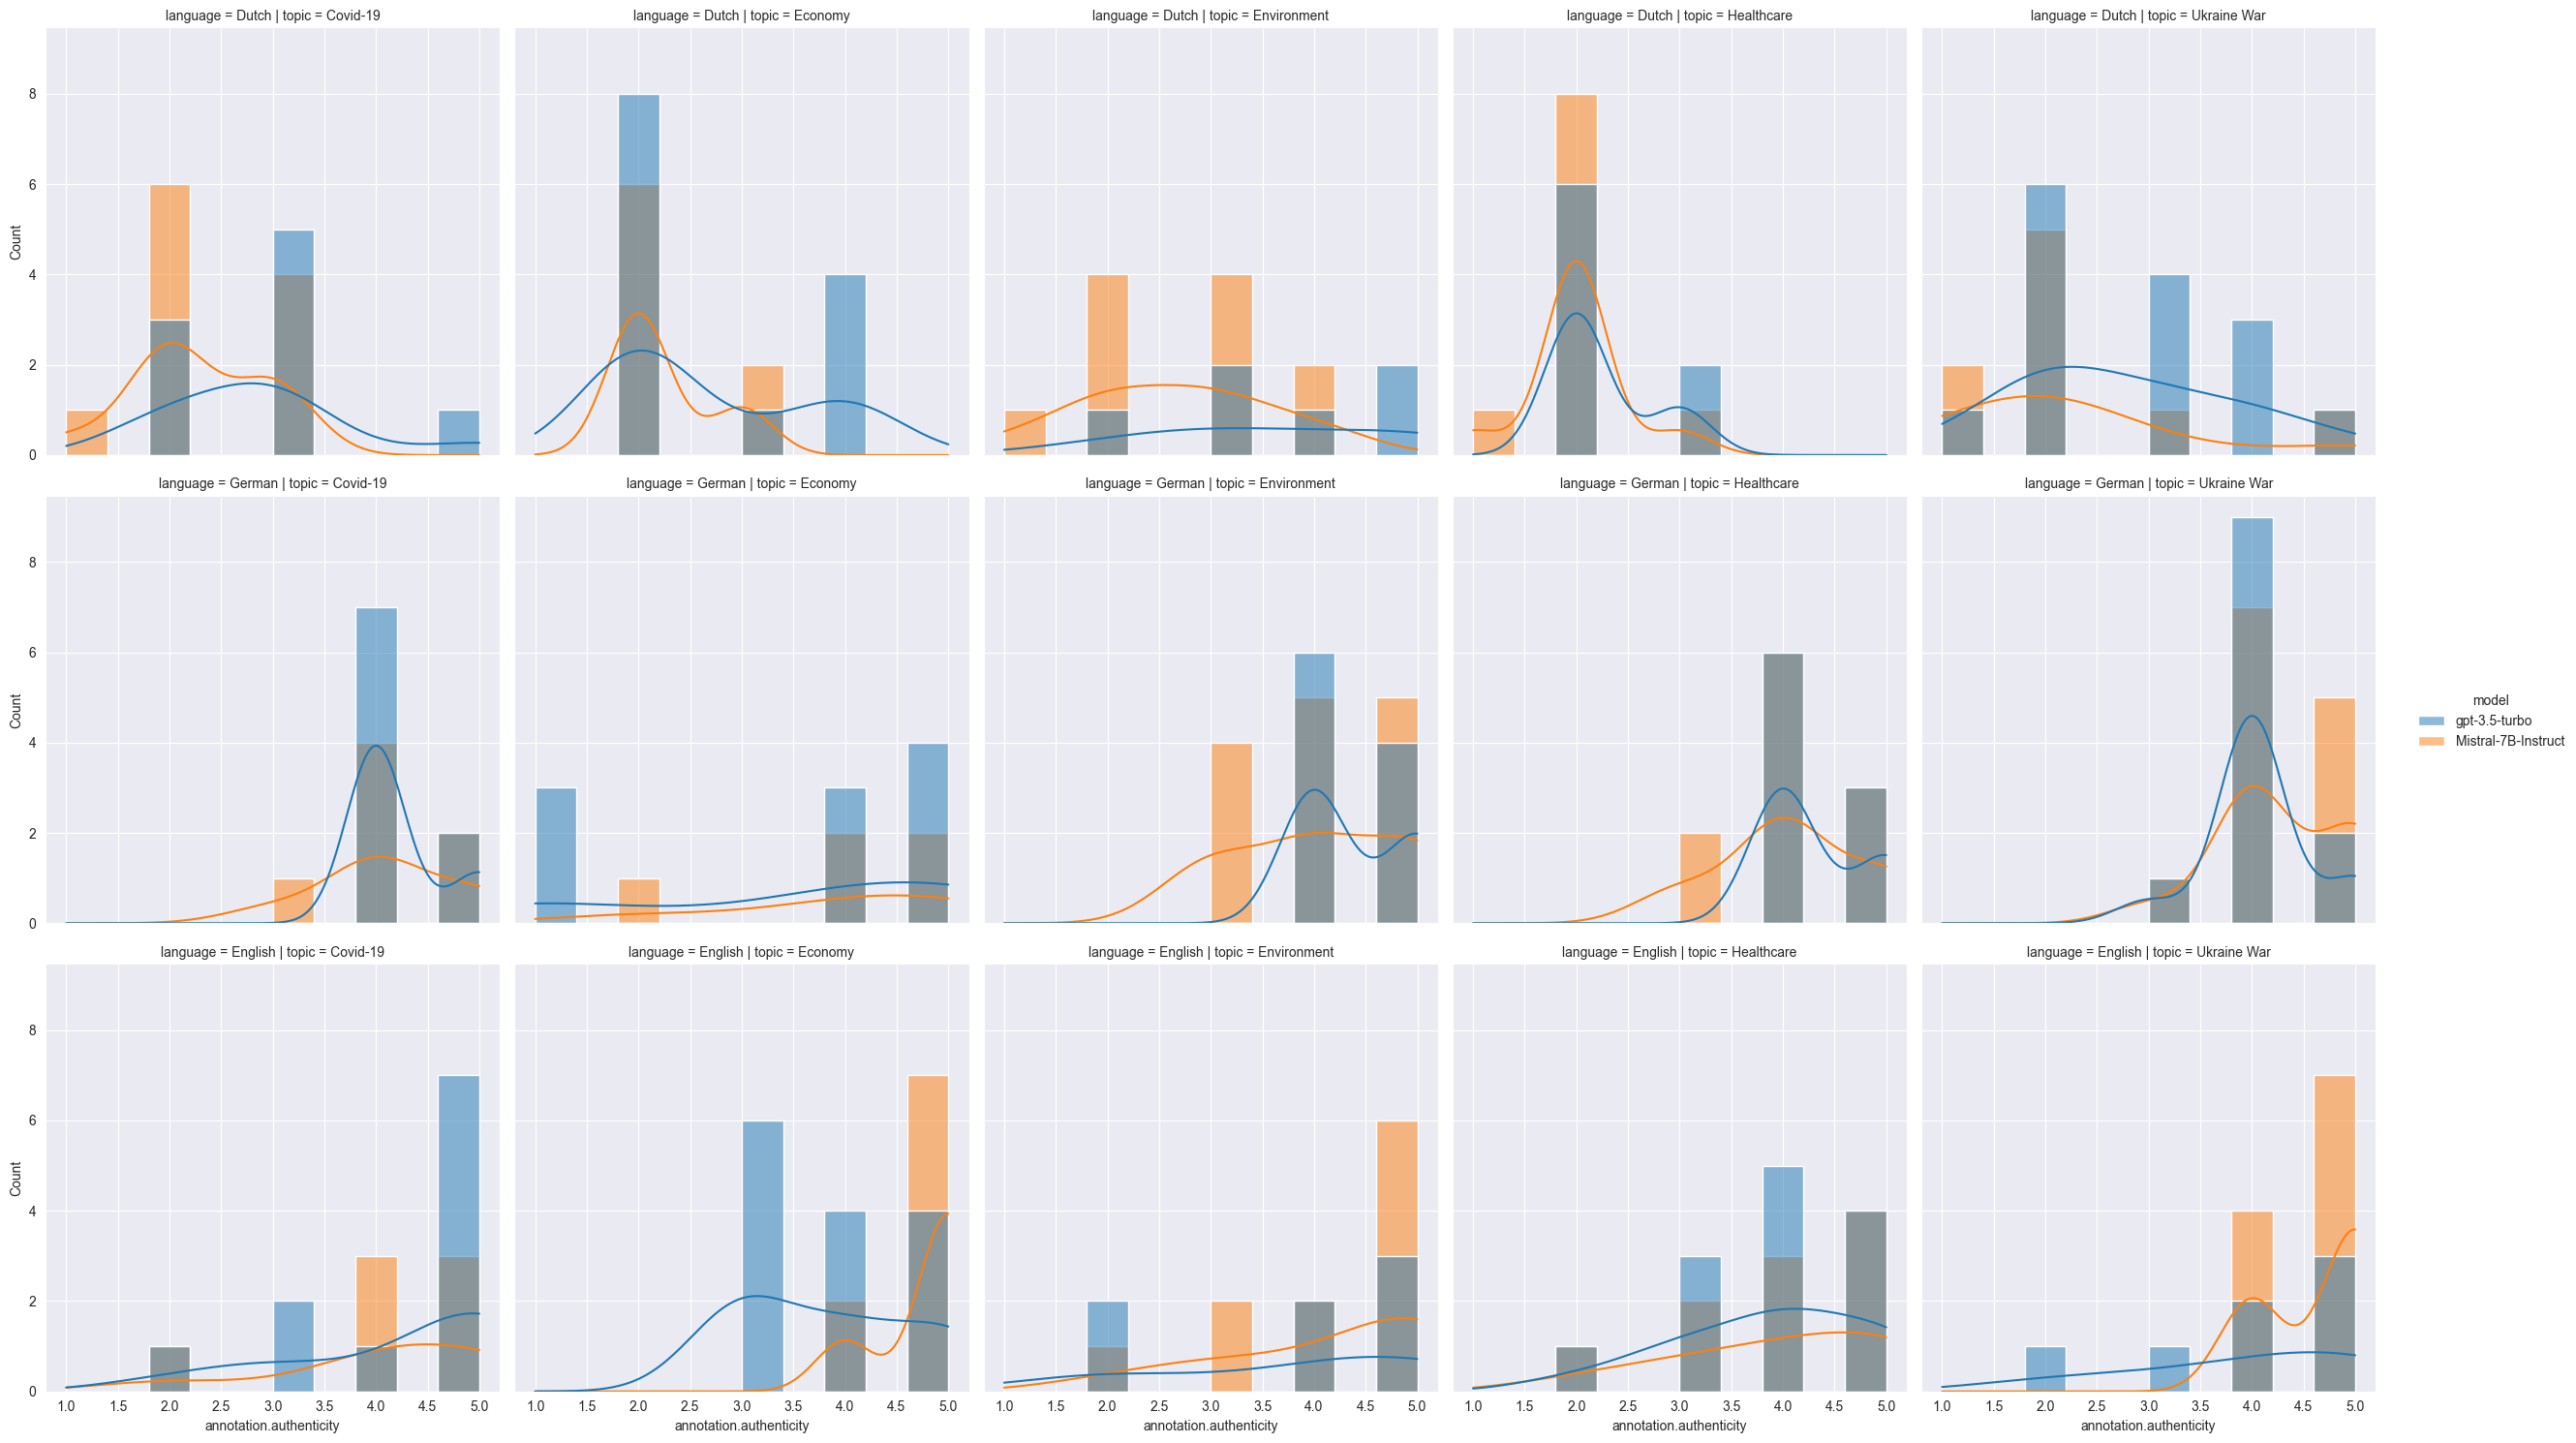

In [30]:
ax = sns.displot(
    stratified_dataset,
    x="annotation.authenticity",
    col="topic",
    row="language",
    hue="model",
    kde=True,
    row_order=LANG_ORDER,
)
ax.savefig(f'{OUT_PATH}/dist.topic.language.model.auth.pdf', **FIG_EXPORT_KWARGS)
ax.savefig(f'{OUT_PATH}/dist.topic.language.model.auth.transparent.pdf', transparent=True, **FIG_EXPORT_KWARGS)

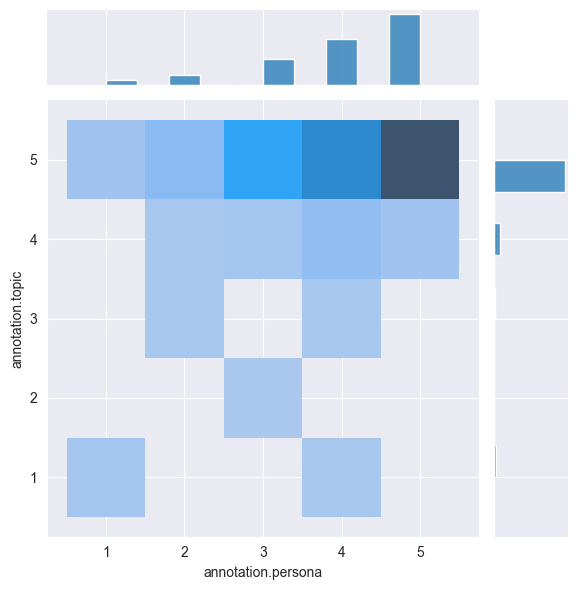

In [31]:
ax = sns.jointplot(
    data=stratified_dataset,
    x="annotation.persona",
    y="annotation.topic",
    discrete=True,
    kind="hist",
)
ax.savefig(f'{OUT_PATH}/joint.persona.topic.pdf', **FIG_EXPORT_KWARGS)
ax.savefig(f'{OUT_PATH}/joint.persona.topic.transparent.pdf', transparent=True, **FIG_EXPORT_KWARGS) 